In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FinalDataset.csv")
data.head()

,Start Timestamp,End Timestamp,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,...,FFT_116,FFT_117,FFT_118,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124,Label
0,1.005,1.997,3.17224,5.81,2.116479,3.813475,-1.139828,-0.407959,6.78,12.51,...,3.491304,4.499943,4.796797,6.354283,7.887080,11.478673,19.052146,41.639898,180.335878,0
1,1.504,2.492,-0.25152,4.97,2.553746,2.566102,-1.043102,0.577409,8.25,9.68,...,18.893999,21.130172,21.896142,27.830085,32.080842,41.769792,53.919164,82.934784,183.133061,0
2,1.997,2.993,-2.57304,-0.94,0.511375,2.623364,1.136639,1.290946,2.34,7.37,...,1.092225,3.271215,3.172364,5.703337,5.820801,7.097514,9.443354,14.057565,38.968389,0
3,2.492,3.492,-2.24136,-1.19,0.592439,2.318335,-1.276943,0.142333,1.94,8.12,...,2.437602,5.565809,4.484336,4.958172,8.863119,8.983071,12.314302,20.572591,41.745039,0
4,2.993,3.996,-1.26816,-0.37,0.544954,1.380292,-1.172872,-0.251960,1.88,7.48,...,4.806898,5.320898,4.703393,4.754043,6.530838,8.330221,12.191309,19.017916,38.078630,0


In [6]:
# import random

# # Shuffle the dataset
# shuffled_data = data.sample(frac=1, random_state=42)  # frac=1 shuffles all rows, random_state for reproducibility
shuffled_data = data

NameError: name 'random' is not defined

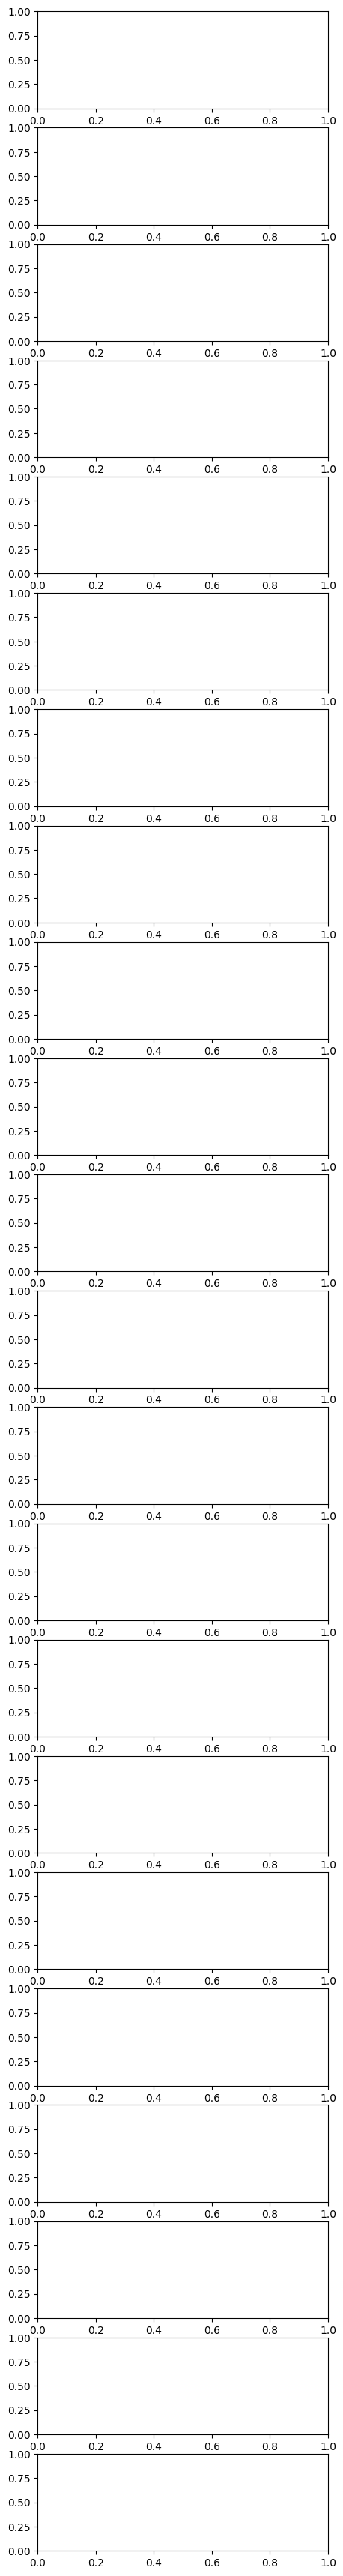

In [7]:
# Get unique labels
unique_labels = shuffled_data['Label'].unique()

# Define colors
colors = plt.cm.tab10.colors  # You can choose any colormap here

# Get columns up to FFT_0
columns_up_to_fft_0 = shuffled_data.columns[:shuffled_data.columns.get_loc("FFT_0") + 1]

num_subplots = len(columns_up_to_fft_0)

fig, axs = plt.subplots(num_subplots, 1, figsize=(5, num_subplots*2))

for i, column in enumerate(columns_up_to_fft_0):
    for label in unique_labels:
        label_data = shuffled_data[shuffled_data['Label'] == label]
        indices = random.sample(range(len(label_data)), min(1200, len(label_data)))  # Randomly select a subset of data points
        axs[i].scatter(label_data.loc[:, column].iloc[indices], 
                       label_data.iloc[indices].index, 
                       label=label,
                       color=colors[label % len(colors)])

    axs[i].set_title(f"Scatter plot for {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Data Index")
    axs[i].legend()

plt.tight_layout()
plt.show()


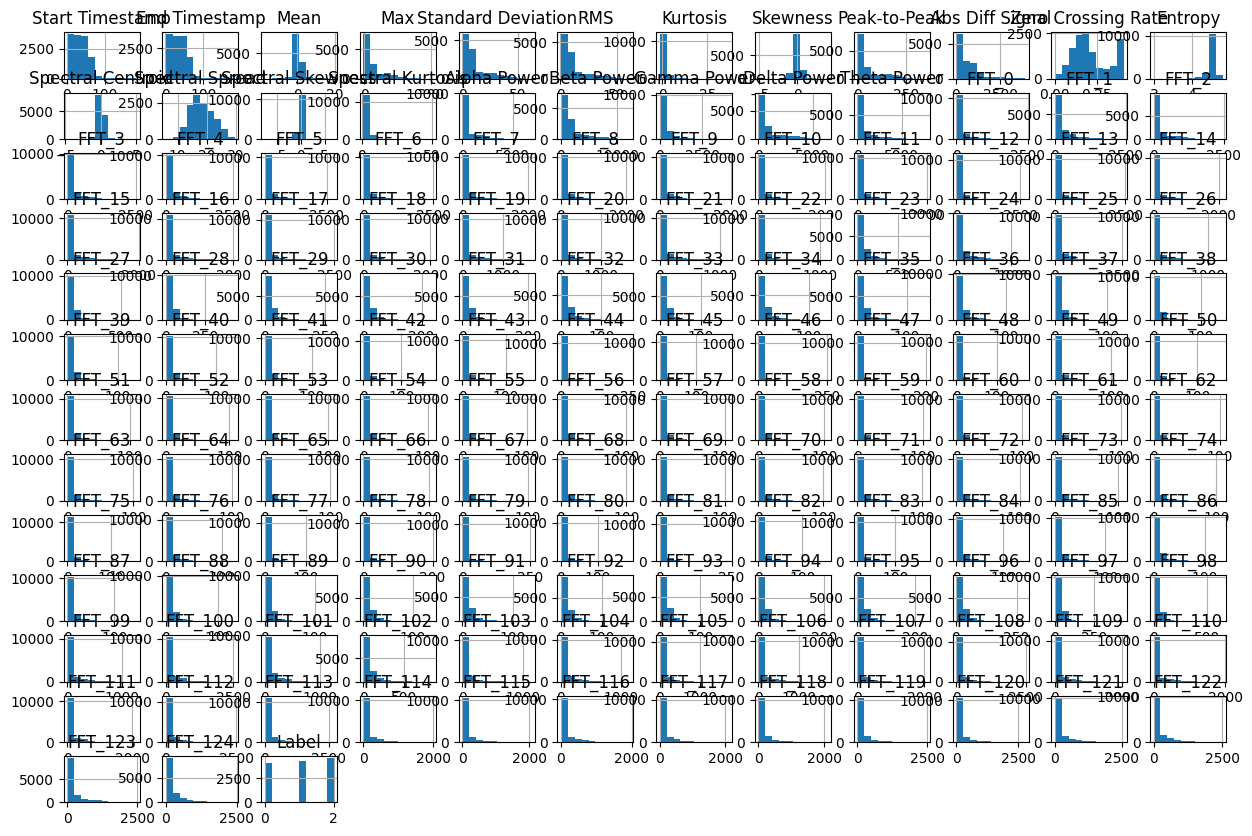

In [47]:
data.hist(figsize=(15, 10))
plt.show()

Start Timestamp       0
End Timestamp         0
Mean                  0
Max                   0
Standard Deviation    0
                     ..
FFT_121               0
FFT_122               0
FFT_123               0
FFT_124               0
Label                 0
Length: 147, dtype: int64


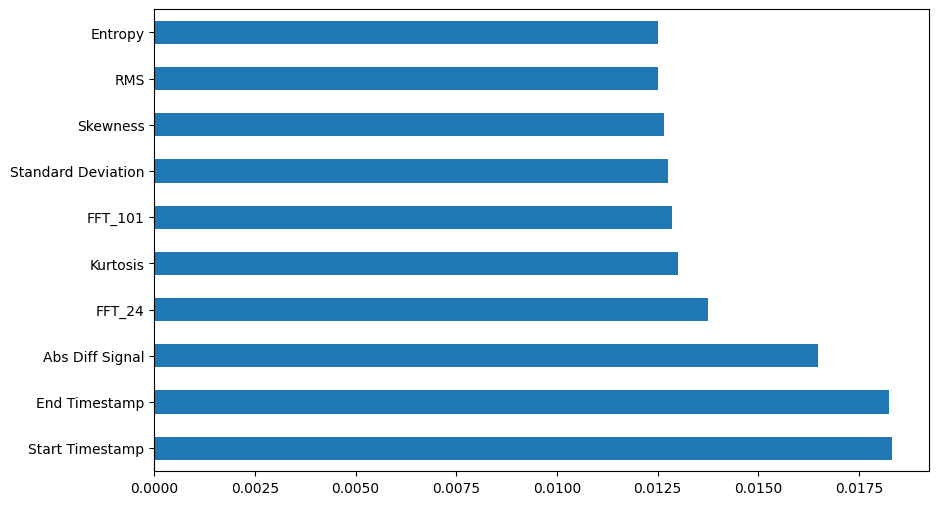

Selected Features: Index(['Start Timestamp', 'End Timestamp', 'Mean', 'Max', 'Standard Deviation',
       'RMS', 'Kurtosis', 'Skewness', 'Peak-to-Peak', 'Abs Diff Signal',
       ...
       'FFT_115', 'FFT_116', 'FFT_117', 'FFT_118', 'FFT_119', 'FFT_120',
       'FFT_121', 'FFT_122', 'FFT_123', 'FFT_124'],
      dtype='object', length=141)
Accuracy: 0.5671929149018098


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('FinalDataset.csv')

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Convert categorical variables to numerical if any
# For simplicity, let's assume all features are numerical

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Label', axis=1))

# # Step 3: Feature Analysis
# # Perform exploratory data analysis (EDA)
# # Example: Histogram of each feature
# data.hist(figsize=(15, 10))
# plt.show()

# # Compute summary statistics
# summary_stats = data.describe()
# print(summary_stats)

# Step 4: Feature Selection
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Label'], test_size=0.2, random_state=42)

# Train a random forest classifier for feature selection
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=data.drop('Label', axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Select features based on importance
sfm = SelectFromModel(rf_classifier, threshold=0.003)
sfm.fit(X_train, y_train)
selected_features = data.drop('Label', axis=1).columns[sfm.get_support()]
print("Selected Features:", selected_features)

# Step 5: Model Training
# Train a model using selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Example: Train a random forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_selected, y_train)

# Step 6: Evaluation
# Evaluate the model
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Deployment (Optional)
# If the model performs well, deploy it in a production environment
# For demonstration purposes, we skip this step


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
data = pd.read_csv('FinalDataset.csv')

# # Step 2: Data Preprocessing
# # Check for missing values
# missing_values = data.isnull().sum()
# print("Missing Values:\n", missing_values)

# Handle missing values if necessary

# Step 3: Feature Analysis
# Pairplot for feature analysis
# sns.pairplot(data, hue='Label')
# plt.show()

# # Correlation matrix
# corr_matrix = data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

# Step 4: Feature Selection
# Split data into train and test sets
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
selected_features_rf = feat_importances.nlargest(25).index.tolist()
print("Selected Features (Random Forest):", selected_features_rf)

# Feature importance using mutual information
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
selected_features_mi = mi_scores.nlargest(25).index.tolist()
print("Selected Features (Mutual Information):", selected_features_mi)

# Select features based on importance
selected_features = list(set(selected_features_rf) | set(selected_features_mi))
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 5: Model Training
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', verbose=5)
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_selected, y_train)

# Step 6: Evaluation
# Cross-validation score
cv_score = cross_val_score(best_rf_classifier, X_train_selected, y_train, cv=3)
print("Cross-Validation Mean Accuracy:", cv_score.mean())

# Evaluate the model
y_pred = best_rf_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Deployment (Optional)
# If the model performs well, deploy it in a production environment



Selected Features (Random Forest): ['End Timestamp', 'Start Timestamp', 'Abs Diff Signal', 'FFT_24', 'Kurtosis', 'FFT_101', 'RMS', 'Entropy', 'Beta Power', 'Standard Deviation', 'Skewness', 'FFT_100', 'Peak-to-Peak', 'FFT_98', 'FFT_25', 'Max', 'FFT_27', 'Delta Power', 'FFT_1', 'FFT_26', 'FFT_99', 'Spectral Kurtosis', 'Alpha Power', 'FFT_124', 'Zero Crossing Rate']
Selected Features (Mutual Information): ['Max', 'Peak-to-Peak', 'Abs Diff Signal', 'FFT_24', 'FFT_101', 'RMS', 'FFT_25', 'FFT_100', 'Standard Deviation', 'Kurtosis', 'FFT_2', 'FFT_123', 'Beta Power', 'Spectral Spread', 'FFT_5', 'FFT_120', 'Skewness', 'FFT_4', 'FFT_121', 'Spectral Skewness', 'FFT_55', 'FFT_70', 'FFT_22', 'FFT_103', 'Entropy']
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.590 total time=  35.6s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.577 total t

In [12]:
"""
MODELS CURRENTLY PERFORMING
1. 60 ACC 0.7 LOSS
Selected Features (Random Forest): ['End Timestamp', 'Start Timestamp', 'Abs Diff Signal', 'FFT_24', 'Kurtosis', 'FFT_101', 'RMS', 'Entropy', 'Beta Power', 'Standard Deviation', 'Skewness', 'FFT_100', 'Peak-to-Peak', 'FFT_98', 'FFT_25', 'Max', 'FFT_27', 'Delta Power', 'FFT_1', 'FFT_26', 'FFT_99', 'Spectral Kurtosis', 'Alpha Power', 'FFT_124', 'Zero Crossing Rate', 'FFT_22', 'FFT_103', 'Theta Power', 'FFT_2', 'FFT_123']
Selected Features (Mutual Information): ['Max', 'Peak-to-Peak', 'Abs Diff Signal', 'FFT_24', 'FFT_101', 'RMS', 'FFT_25', 'FFT_100', 'Standard Deviation', 'Kurtosis', 'Zero Crossing Rate', 'FFT_2', 'FFT_123', 'Beta Power', 'Spectral Spread', 'FFT_5', 'FFT_120', 'Skewness', 'FFT_4', 'FFT_121', 'FFT_55', 'FFT_70', 'FFT_22', 'FFT_103', 'Entropy', 'FFT_28', 'FFT_97', 'FFT_17', 'FFT_108', 'FFT_7']
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
2. 67 ACC NA LOSS
Selected Features (Random Forest): ['FFT_99', 'FFT_26', 'FFT_100', 'FFT_25', 'Abs Diff Signal', 'Standard Deviation', 'Delta Power', 'Start Timestamp', 'RMS', 'Beta Power', 'FFT_27', 'End Timestamp', 'Alpha Power', 'Skewness', 'FFT_98', 'Kurtosis', 'FFT_1', 'FFT_124', 'FFT_123', 'Max']
Selected Features (Mutual Information): ['Max', 'FFT_26', 'FFT_99', 'FFT_25', 'FFT_100', 'Peak-to-Peak', 'Standard Deviation', 'Beta Power', 'FFT_27', 'FFT_98', 'Abs Diff Signal', 'Delta Power', 'RMS', 'FFT_24', 'FFT_101', 'FFT_1', 'FFT_124', 'FFT_29', 'FFT_96', 'Theta Power']
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
3. """

"\nMODELS CURRENTLY PERFORMING\n1. 60 ACC 0.7 LOSS\nSelected Features (Random Forest): ['End Timestamp', 'Start Timestamp', 'Abs Diff Signal', 'FFT_24', 'Kurtosis', 'FFT_101', 'RMS', 'Entropy', 'Beta Power', 'Standard Deviation', 'Skewness', 'FFT_100', 'Peak-to-Peak', 'FFT_98', 'FFT_25', 'Max', 'FFT_27', 'Delta Power', 'FFT_1', 'FFT_26', 'FFT_99', 'Spectral Kurtosis', 'Alpha Power', 'FFT_124', 'Zero Crossing Rate', 'FFT_22', 'FFT_103', 'Theta Power', 'FFT_2', 'FFT_123']\nSelected Features (Mutual Information): ['Max', 'Peak-to-Peak', 'Abs Diff Signal', 'FFT_24', 'FFT_101', 'RMS', 'FFT_25', 'FFT_100', 'Standard Deviation', 'Kurtosis', 'Zero Crossing Rate', 'FFT_2', 'FFT_123', 'Beta Power', 'Spectral Spread', 'FFT_5', 'FFT_120', 'Skewness', 'FFT_4', 'FFT_121', 'FFT_55', 'FFT_70', 'FFT_22', 'FFT_103', 'Entropy', 'FFT_28', 'FFT_97', 'FFT_17', 'FFT_108', 'FFT_7']\n{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}\n2. 67 ACC NA LOSS\nSelected Features (R

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the dataset
data = pd.read_csv('FinalDataset.csv')
scaler = StandardScaler()
# Step 2: Data Preprocessing
X = data.drop('Label', axis=1)
X = scaler.fit_transform(X)
X = X.reshape(-1, 146, 1)
y = data['Label']

y = to_categorical(y, 3)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reshape the data for RNN input (assuming a single time step)
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Step 3: Build the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_train, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 6: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/50
 65/260 [======>.......................] - ETA: 24s - loss: 0.6492 - accuracy: 0.3639

KeyboardInterrupt: 